<a href="https://colab.research.google.com/github/Namansh0660/Prasunet_ML_03/blob/main/Prodigy_ML_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'dogs-vs-cats:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F3362%2F31148%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240628%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240628T175305Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D13b98b720688980c4ce99ed18c506a4ebeeaaab83bcce2e13c2303de1eb5f664e82b1ee0879cd62379cb4506a4ceedd82122e4d6d53c5d24279a9c3edb064151cdb51e301327041d3a3b7999be6b6646b3997bd609a069171305f9873062c7f308f577e6d43fd0e81ba892bc854d2148d68910fbcebc9cf98e495559ea4d89c719c16fd6635b8cd4aa51a971c739ad3c67f18c06dddbbe74c6f6d7c2ad8db76dea587e49bc20363672c3358c9a9ead521b9e39411146fd09e7de51410ab3aca0ba0e6c06dada733b4482f591aa51718d13226922e2203ec5b48e55a1e133861cb59cd96dd7d1d960c8d2f7ee3c1a7c4c35e77974204b4481d865d0c0805b31af'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 851576689 bytes downloaded
Downloaded and uncompressed: dogs-vs-cats
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/sampleSubmission.csv
/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip


In [3]:
import tensorflow as tf

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report


In [4]:
batch_size = 32
num_classes = 10
epochs = 100

In [5]:
from tensorflow.keras.datasets import cifar10

In [6]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [7]:
print('X_train Shape: {}'.format(X_train.shape))
print('X_test Shape: {}'.format(X_test.shape))
print('Y_train Shape: {}'.format(Y_train.shape))
print('Y_test Shape: {}'.format(Y_test.shape))

X_train Shape: (50000, 32, 32, 3)
X_test Shape: (10000, 32, 32, 3)
Y_train Shape: (50000, 1)
Y_test Shape: (10000, 1)


Normalizing

In [8]:
X_train = X_train/255
X_test = X_test/255

One-Hot-Encoding

In [9]:
Y_train_en = tf.keras.utils.to_categorical(Y_train,10)
Y_test_en = tf.keras.utils.to_categorical(Y_test,10)

In [10]:
import tensorflow as tf

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (4, 4), activation="relu",input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (4, 4), activation="relu",input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')])



In [12]:
model.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])


In [13]:
model.summary()
history = model.fit(X_train, Y_train_en, epochs = 30, verbose=1,validation_data=(X_test,Y_test_en))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

In [14]:
evaluation = model.evaluate(X_test, Y_test_en)
print('Test Accuracy of Base Model: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 4ms/step - loss: 1.9817 - accuracy: 0.6455
Test Accuracy of Base Model: 0.6455000042915344


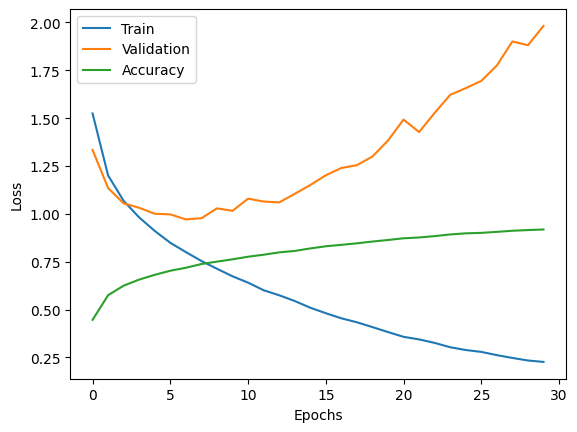

In [ ]:
def plotloss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation', 'Accuracy'])
    plt.show()
plotloss(history)

As validation loss is quite increasing we can say that the model is overfitting

Let's try adding Dropout

In [16]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (4, 4), activation="relu",input_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(32, (4, 4), activation="relu",input_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units=10, activation='softmax')])



In [17]:
model_2.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])


In [18]:
model_2.summary()
history_2 = model_2.fit(X_train, Y_train_en, epochs = 30, verbose=1, validation_data=(X_test,Y_test_en))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 batch_normalization (Batch  (None, 29, 29, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 32)        128       
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                      

In [19]:
evaluation = model_2.evaluate(X_test, Y_test_en)
print('Test Accuracy of Model_2(with more  filters): {}'.format(evaluation[1]))


313/313 [==============================] - 1s 3ms/step - loss: 0.8025 - accuracy: 0.7186
Test Accuracy of Model_2(with more  filters): 0.7185999751091003


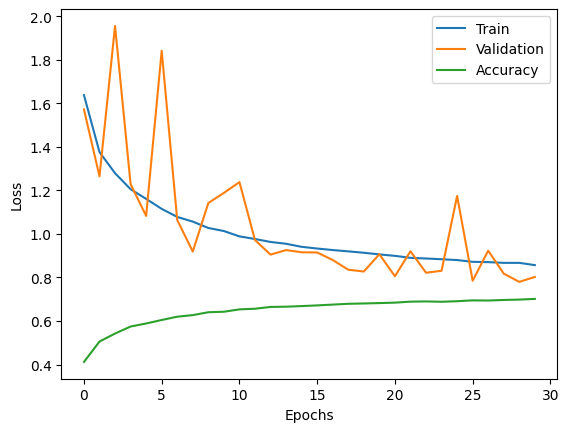

In [ ]:
def plotloss(history_2):
    plt.plot(history_2.history['loss'])
    plt.plot(history_2.history['val_loss'])
    plt.plot(history_2.history['accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation', 'Accuracy'])
    plt.show()
plotloss(history_2)

In [21]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (4, 4), activation="relu",input_shape=(32, 32, 3),padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (4, 4), activation="relu",input_shape=(32, 32, 3),padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (4, 4), activation="relu",input_shape=(32, 32, 3),padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (4, 4), activation="relu",input_shape=(32, 32, 3),padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (4, 4), activation="relu",input_shape=(32, 32, 3),padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (4, 4), activation="relu",input_shape=(32, 32, 3),padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.35),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation='softmax'),])



In [22]:
model_3.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])


In [23]:
model_3.summary()
history_3 = model_3.fit(X_train, Y_train_en, epochs = 30, verbose=1, validation_data=(X_test,Y_test_en))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        3136      
                                                                 
 batch_normalization_5 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        65600     
                                                                 
 batch_normalization_6 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                      

In [24]:
evaluation = model_3.evaluate(X_test, Y_test_en)
print('Test Accuracy of Model_2(with more  filters): {}'.format(evaluation[1]))


313/313 [==============================] - 2s 7ms/step - loss: 0.6435 - accuracy: 0.8488
Test Accuracy of Model_2(with more  filters): 0.848800003528595


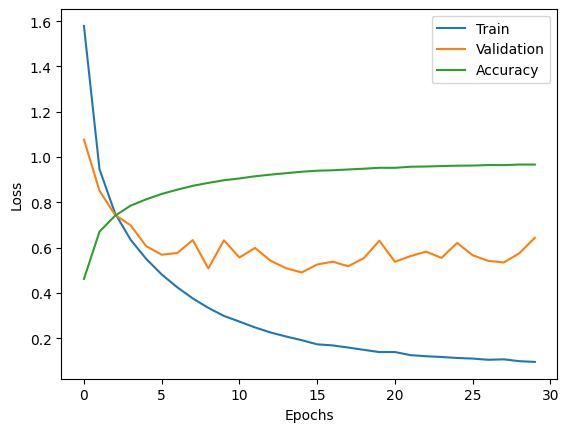

In [25]:
def plotloss(history_3):
    plt.plot(history_3.history['loss'])
    plt.plot(history_3.history['val_loss'])
    plt.plot(history_3.history['accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation', 'Accuracy'])
    plt.show()
plotloss(history_3)